<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%204/Exersize%207.%20Using%20Isolation%20Forest%20to%20find%20anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas, matplotlib, and scikit learn
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 80)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 7)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%204/datasets/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

In [2]:
# create a standardized analysis data frame
analysisvars = ['location','total_cases_pm','total_deaths_pm',
  'pop_density','median_age','gdp_per_capita']
standardizer = StandardScaler()
covidtotals.isnull().sum()

lastdate            0
location            0
total_cases         0
total_deaths        0
total_cases_pm      0
total_deaths_pm     0
population          0
pop_density        12
median_age         24
gdp_per_capita     28
hosp_beds          46
dtype: int64

In [3]:
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

In [4]:
 # run an isolation forest model to detect outliers
clf=IsolationForest(n_estimators=100, max_samples='auto',
  contamination=.1, max_features=1.0)
clf.fit(covidanalysisstand)
covidanalysis['anomaly'] = clf.predict(covidanalysisstand)
covidanalysis['scores'] = clf.decision_function(covidanalysisstand)
covidanalysis.anomaly.value_counts()

 1    157
-1     18
Name: anomaly, dtype: int64

In [5]:
# view the outliers
inlier, outlier = covidanalysis.loc[covidanalysis.anomaly==1],\
  covidanalysis.loc[covidanalysis.anomaly==-1]
outlier[['location','total_cases_pm','total_deaths_pm',\
  'median_age','gdp_per_capita','scores']].\
  sort_values(['scores']).\
  head(10)

,location,total_cases_pm,total_deaths_pm,median_age,gdp_per_capita,scores
iso_code,,,,,,
QAT,Qatar,19753.146,13.190,31.9,116935.600,-0.228553
SGP,Singapore,5962.727,3.931,42.4,85535.383,-0.217556
HKG,Hong Kong,0.000,0.000,44.8,56054.920,-0.186328
BEL,Belgium,5037.354,816.852,41.8,42658.576,-0.123875
BHR,Bahrain,6698.468,11.166,32.4,43290.705,-0.111492
LUX,Luxembourg,6418.776,175.726,39.7,94277.965,-0.110667
ITA,Italy,3853.985,552.663,47.9,35220.084,-0.074480
ESP,Spain,5120.952,580.197,45.5,34272.360,-0.073801
GBR,United Kingdom,4047.403,566.965,40.8,39753.244,-0.039409


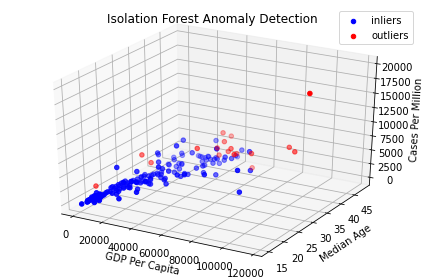

In [7]:
# plot the inliers and outliers
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel("Cases Per Million")
ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Median Age")
ax.scatter3D(inlier.gdp_per_capita, inlier.median_age, inlier.total_cases_pm, label="inliers", c="blue")
ax.scatter3D(outlier.gdp_per_capita, outlier.median_age, outlier.total_cases_pm, label="outliers", c="red")
ax.legend()
plt.tight_layout()
plt.show()